In [1]:
# ============================================================
# 1. Importación de librerías
# ============================================================
import numpy as np
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# ============================================================
# 2. Carga del dataset
# ============================================================
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  
    transforms.ToTensor()  
])
dataset = ImageFolder(r"C:\Users\MSI LAPTOP\datasets\notMNIST_small", transform=transform)

print("\nDatos del Dataset:")
print("Total de imágenes:", len(dataset))
print("Clases:", dataset.classes)





Datos del Dataset:
Total de imágenes: 18724
Clases: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


In [3]:
print(dataset[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0471, 0.0431, 0.0039, 0.0000, 0.0353, 0.0196,
          0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0588, 0.0902, 0.3216, 0.4549, 0.2392, 0.3490,
          0.1412, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0078, 0.0000, 0.2745, 0.6196, 0.7686, 1.0000, 0.8706, 0.8863,
          0.4863, 0.1216, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078,
          0.0000, 0.1725, 0.5686, 0.8000, 1.0000, 0.9804, 0.9922, 1.0000,
          0.8941, 0.5451, 0.0000, 0.0039, 0.0000, 0.0000

In [4]:
# ============================================================
# 3. Procesamiento y extracción de datos y etiquetas
# ============================================================
def process_image(img):
    return img.view(-1)

X = torch.stack([process_image(img) for img, _ in dataset])
Y = torch.tensor([label for _, label in dataset])


In [5]:
# ============================================================
# 4. División del dataset en entrenamiento y prueba
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("\nCantidad de Datos en Entrenamiento y Prueba:")
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)


Cantidad de Datos en Entrenamiento y Prueba:
X_train.shape: torch.Size([14979, 784])
X_test.shape: torch.Size([3745, 784])
y_train.shape: torch.Size([14979])
y_test.shape: torch.Size([3745])


In [6]:
# ============================================================
# 5. Definición de funciones auxiliares (Softmax y Evaluate)
# ============================================================
def softmax(x):
    exp_x = torch.exp(x)
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

def evaluate(x):
    model.eval()
    y_pred = model(x)
    y_probas = softmax(y_pred)
    return torch.argmax(y_probas, axis=1)

In [7]:
# ============================================================
# 6. Definición del modelo personalizado (Custom Model)
# ============================================================
class ModeloPersonalizado(torch.nn.Module):
    def __init__(self, D_in, h1, h2, h3, D_out):
        super(ModeloPersonalizado, self).__init__()
        self.fc1 = torch.nn.Linear(D_in, h1)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(h1, h2)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(h2, h3)
        self.relu3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(h3, D_out)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)    
        x = self.relu3(x)
        x = self.fc4(x)
        return x

model = ModeloPersonalizado(D_in=784, h1=1024, h2=512, h3=128, D_out=10).to("cuda")

In [8]:
# ============================================================
# 7. Configuración de la función de pérdida, optimizador y conversión de datos
# ============================================================
criterion = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

X_t = X_train.float().cuda()
Y_t = y_train.long().cuda() 


In [9]:
# ============================================================
# 8. Bucle de entrenamiento
# ============================================================
print("\nEntrenamiento del Modelo:")
epochs = 5000
log_each = 200
l = []

model.train()
for e in range(1, epochs+1):
    y_pred = model(X_t)
    loss = criterion(y_pred, Y_t)
    l.append(loss.item())
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")


Entrenamiento del Modelo:
Epoch 200/5000 Loss 0.99745
Epoch 400/5000 Loss 0.68222
Epoch 600/5000 Loss 0.55632
Epoch 800/5000 Loss 0.48807
Epoch 1000/5000 Loss 0.43614
Epoch 1200/5000 Loss 0.39500
Epoch 1400/5000 Loss 0.37472
Epoch 1600/5000 Loss 0.35249
Epoch 1800/5000 Loss 0.32684
Epoch 2000/5000 Loss 0.30405
Epoch 2200/5000 Loss 0.28571
Epoch 2400/5000 Loss 0.26589
Epoch 2600/5000 Loss 0.24780
Epoch 2800/5000 Loss 0.23163
Epoch 3000/5000 Loss 0.21724
Epoch 3200/5000 Loss 0.20442
Epoch 3400/5000 Loss 0.19297
Epoch 3600/5000 Loss 0.18269
Epoch 3800/5000 Loss 0.17342
Epoch 4000/5000 Loss 0.16504
Epoch 4200/5000 Loss 0.15743
Epoch 4400/5000 Loss 0.15048
Epoch 4600/5000 Loss 0.14412
Epoch 4800/5000 Loss 0.13827
Epoch 5000/5000 Loss 0.13288


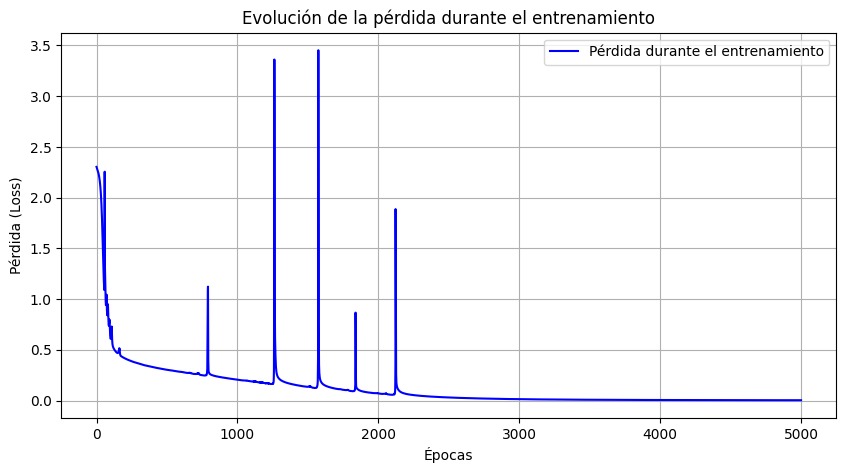

In [10]:
import matplotlib.pyplot as plt

# Crear gráfico de la pérdida
plt.figure(figsize=(10, 5))
plt.plot(l, label='Pérdida durante el entrenamiento', color='blue')
plt.xlabel("Épocas")
plt.ylabel("Pérdida (Loss)")
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# ============================================================
# 9. Evaluación del modelo en el conjunto de prueba
# ============================================================
y_pred = evaluate(X_test.float().cuda())
acc = accuracy_score(y_test.cpu().numpy(), y_pred.cpu().numpy()) 

print("\nResultados del Entrenamiento:")
print(f"Accuracy: {acc:.4f} {acc*100:.2f}%")

error_final = 1 - acc
print(f"Error final de clasificación: {error_final:.4f} ({error_final*100:.2f}%)")

print("\nCapas del Modelo:")
print(list(model.children()))
print()


Resultados del Entrenamiento:
Accuracy: 0.9252 92.52%
Error final de clasificación: 0.0748 (7.48%)

Capas del Modelo:
[Linear(in_features=784, out_features=1024, bias=True), ReLU(), Linear(in_features=1024, out_features=512, bias=True), ReLU(), Linear(in_features=512, out_features=128, bias=True), ReLU(), Linear(in_features=128, out_features=10, bias=True)]



In [12]:
# ============================================================
# 10. Resumen de experimentos
# ============================================================

'''
Tabla resumen de pruebas (organizada por LR):

|-------------------------------------------------------------------------------------------------------|
|          Arquitectura          |  Epocas  | LR=0.001 | LR=0.01 | LR=0.08 | LR=0.1  |  LR=0.3 | LR=0.8 |
|-------------------------------------------------------------------------------------------------------|
| 3 Capas (512,256,64)           |   1500   |     -    |    -    |  9.03%  |  8.11%  |  8.38%  | 13.62% |
| 3 Capas (2024,512,32)          |   2000   |     -    |    -    |    -    |  8.52%  |  9.48%  |   -    |
| 3 Capas (2024,512,64)          |   2000   |     -    |    -    |    -    |  7.58%  |    -    |   -    |
| 3 Capas (1024,512,128)         |   2000   |     -    |  9.61%  |    -    |  7.37%  |  90%    |   -    | 
| 3 Capas (1024,512,128)         |   12000  |     -    |    -    |    -    |  7.48%  |         |   13%  |
| 3 Capas (1024,512,128)         |   5000   |     -    |    -    |    -    |  7.24%  |  8.53%  |        |
| 3 Capas (1024,512,256)         |   1500   |     -    |  12.07% |    -    |  7.69%  |  8.52%  |  90%   |
| 3 Capas (1024,512,256)         |    500   |     -    |  20.69% |    -    |    -    |    -    |   -    |
| 2 Capas (512,128)              |   1500   |     -    |    -    |    -    |  8.62%  |  8.53%  | 13.14% |
| 2 Capas (512,128)              |   3000   |     -    |    -    |    -    |  7.74%  |  8.42%  |  90%   |
| 3 Capas (512,128,32)           |   1500   |     -    |    -    |    -    |  8.54.% |  8.57.% | 13.02% |
| 3 Capas (512,128,32)           |   500    |     -    |    -    |    -    |         |  9.21%  |        |
| 3 Capas (392,128,16)           |   1500   |     -    |    -    |  8.54%  |  8.14%  |  90%    |        |
| 3 Capas (392,16)               |   1500   |     -    |         |  16.56% |  8.57%  |  8.6%   | 13.89% |
| 3 Capas (1024,512,128)         |   3000   |     -    |  10.81% |    -    |         |         |        |
| 3 Capas (1024,512,128)         |   6000   |  13.97%  |    -    |    -    |     -   |   -     |    -   |
| 3 Capas (1024,512,128)         |   8000   |  14.29%  |         |         |         |         |        | 
| 4 Capas (1024,512,256,128)     |   1500   |     -    |         |         |  7.69%  |         |        |
| 3 Capas (1024,512,128)         |   1000   |     -    |         |    -    |   -     |  8.73%  |        |
| 3 Capas (1024,512,128)         |   2000   |          | 13.27%  |    -    |     -   |   -     |    -   |
| 3 Capas (1024,512,128)         |   4000   |          | 11.16%  |         |         |         |        |
| 4 Capas (1024,512,256,128)     |   6000   |     -    |  9.91%  |         |  8.39%  |  8.61%  | 13.02% |
| 4 Capas (1024,512,256,128)     |   8000   |  64.28%  |         |         |         |         |        | 
| 4 Capas (1024,512,256,128)     |   20000  |  14.23%  |         |         |  8.12%  |  8.24%  | 13.91% |
| 4 Capas (1024,512,256,128)     |   25000  |  11.05%  |         |         |         |         |        |
| 4 Capas (2048,1024,512,216)    |   6000   |          | 12.84%  |         |         |         |        | 
| 4 Capas (2048,1024,512,216)    |   7000   |          |  8.46%  |         |         |         | 12.74% |
| 4 Capas (2048,1024,512,216)    |   7200   |          |  8.25%  |         |         |         |        |
| 4 Capas (2048,1024,512,216)    |   1500   |          |  -      |         |  7.72%  |  8.83%  | 13.08% |                    
--------------------------------------------------------------------------------------------------------|

Total de perceptrones: 1674
Total de parametros: 1.394.566 (Pesos y Bias)  

'''

'\nTabla resumen de pruebas (organizada por LR):\n\n|-------------------------------------------------------------------------------------------------------|\n|          Arquitectura          |  Epocas  | LR=0.001 | LR=0.01 | LR=0.08 | LR=0.1  |  LR=0.3 | LR=0.8 |\n|-------------------------------------------------------------------------------------------------------|\n| 3 Capas (512,256,64)           |   1500   |     -    |    -    |  9.03%  |  8.11%  |  8.38%  | 13.62% |\n| 3 Capas (2024,512,32)          |   2000   |     -    |    -    |    -    |  8.52%  |  9.48%  |   -    |\n| 3 Capas (2024,512,64)          |   2000   |     -    |    -    |    -    |  7.58%  |    -    |   -    |\n| 3 Capas (1024,512,128)         |   2000   |     -    |  9.61%  |    -    |  7.37%  |  90%    |   -    | \n| 3 Capas (1024,512,128)         |   12000  |     -    |    -    |    -    |  7.48%  |         |   13%  |\n| 3 Capas (1024,512,128)         |   5000   |     -    |    -    |    -    |  7.24%  |  8.5